In [52]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv -P ../data/regression_dataset

--2023-12-15 12:02:30--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘../data/regression_dataset/winequality-white.csv’

winequality-white.c     [   <=>              ] 258.23K   407KB/s    in 0.6s    

2023-12-15 12:02:31 (407 KB/s) - ‘../data/regression_dataset/winequality-white.csv’ saved [264426]



In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import plotly.graph_objects as go 

Loading and Exploring the Dataset:

In [54]:
# Load the White Wine Quality dataset
white_wine_df = pd.read_csv('../data/regression_dataset/winequality-white.csv', delimiter=';')

# Display the first few rows of the dataset
print(white_wine_df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

Data Preprocessing:

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dio

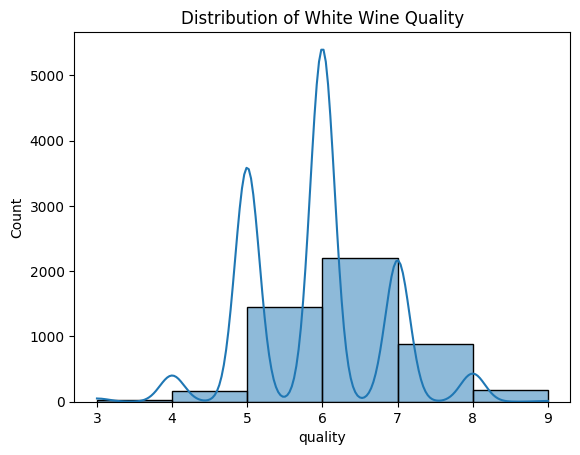

In [55]:
# Check for missing values
print(white_wine_df.isnull().sum())

# Explore summary statistics
print(white_wine_df.describe())

# Visualize the distribution of wine quality
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(white_wine_df['quality'], bins=range(3, 10), kde=True)
plt.title('Distribution of White Wine Quality')
plt.show()

Modeling
Linear Regression:

In [56]:
# Split the data into features (X) and target variable (y)
X = white_wine_df.drop('quality', axis=1)
y = white_wine_df['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Create a linear regression model
linear_model = LinearRegression()
# Fit the model to the training data
linear_model.fit(X_train, y_train)

LinearRegression()

In [58]:
# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.5690247717229256
R-squared: 0.26527500421791517


Polynomial Regression:

In [59]:
# Create a polynomial regression model with degree 2
poly_model = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression())

# Fit the model to the training data
poly_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_poly = poly_model.predict(X_test)

In [60]:
# Evaluate the polynomial model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f'Mean Squared Error (Polynomial): {mse_poly}')
print(f'R-squared (Polynomial): {r2_poly}')

Mean Squared Error (Polynomial): 0.6193710965598693
R-squared (Polynomial): 0.2002678109608197


Linear Regression 2D Visualization:

In [61]:
# Assuming X_test, y_test, and y_pred are defined from the linear regression code

# Scatter plot of actual vs predicted values for Linear Regression
scatter_linear = go.Scatter(x=X_test['alcohol'], y=y_test,
                            mode='markers', name='Actual', marker=dict(color='blue'))

scatter_linear_pred = go.Scatter(x=X_test['alcohol'], y=y_pred,
                                 mode='lines', name='Predicted', line=dict(color='red'))

layout_linear = go.Layout(title='Linear Regression: Actual vs Predicted',
                          xaxis=dict(title='Alcohol Content'),
                          yaxis=dict(title='Wine Quality'))

In [62]:
fig_linear = go.Figure(data=[scatter_linear, scatter_linear_pred], layout=layout_linear)
fig_linear.show()

Polynomial Regression 2D Visualization:

In [63]:
# Assuming X_test, y_test, and y_pred_poly are defined from the polynomial regression code

# Scatter plot of actual vs predicted values for Polynomial Regression
scatter_poly = go.Scatter(x=X_test['alcohol'], y=y_test,
                          mode='markers', name='Actual', marker=dict(color='blue'))

scatter_poly_pred = go.Scatter(x=X_test['alcohol'], y=y_pred_poly,
                               mode='lines', name='Predicted', line=dict(color='red'))

layout_poly = go.Layout(title='Polynomial Regression: Actual vs Predicted',
                        xaxis=dict(title='Alcohol Content'),
                        yaxis=dict(title='Wine Quality'))

In [64]:
fig_poly = go.Figure(data=[scatter_poly, scatter_poly_pred], layout=layout_poly)
fig_poly.show()

Linear Regression 3D Visualization

In [65]:
# Assuming X_test, y_test, and y_pred are defined from the linear regression code

# Scatter 3D plot of actual vs predicted values for Linear Regression
scatter_linear_3d = go.Scatter3d(
    x=X_test['alcohol'],
    y=X_test['volatile acidity'],
    z=y_test,
    mode='markers',
    name='Actual',
    marker=dict(color='blue')
)

scatter_linear_pred_3d = go.Scatter3d(
    x=X_test['alcohol'],
    y=X_test['volatile acidity'],
    z=y_pred,
    mode='lines',
    name='Predicted',
    line=dict(color='red')
)
layout_linear_3d = go.Layout(
    title='Linear Regression: Actual vs Predicted (3D)',
    scene=dict(
        xaxis=dict(title='Alcohol Content'),
        yaxis=dict(title='Volatile Acidity'),
        zaxis=dict(title='Wine Quality')
    )
)

fig_linear_3d = go.Figure(data=[scatter_linear_3d, scatter_linear_pred_3d], layout=layout_linear_3d)
fig_linear_3d.show()


In [66]:
# Assuming X_test, y_test, and y_pred are defined from the linear regression code

# Scatter 3D plot of actual vs predicted values for Linear Regression
# Scatter 3D plot of actual vs predicted values for Linear Regression
scatter_linear_3d_all = go.Scatter3d(x=X_test['fixed acidity'], y=X_test['volatile acidity'], z=X_test['citric acid'],
                                     mode='markers', name='Actual', marker=dict(color='blue'))

scatter_linear_pred_3d_all = go.Scatter3d(x=X_test['fixed acidity'], y=X_test['volatile acidity'], z=y_pred,
                                          mode='lines', name='Predicted', line=dict(color='red'))

layout_linear_3d_all = go.Layout(title='Linear Regression: Actual vs Predicted (3D) - All Features',
                                  scene=dict(xaxis=dict(title='Fixed Acidity'),
                                             yaxis=dict(title='Volatile Acidity'),
                                             zaxis=dict(title='Citric Acid')))

fig_linear_3d_all = go.Figure(data=[scatter_linear_3d_all, scatter_linear_pred_3d_all], layout=layout_linear_3d_all)
fig_linear_3d_all.show()

Polynomial Regression 3D Visualization

In [67]:
# Create a polynomial feature transformer
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# Fit and transform the training data
X_poly_train = poly_features.fit_transform(X_train)

# Transform the test data
X_poly_test = poly_features.transform(X_test)

# Create a linear regression model
poly_model = LinearRegression()

# Fit the model to the training data
poly_model.fit(X_poly_train, y_train)

# Make predictions on the test set
y_pred_poly = poly_model.predict(X_poly_test)

# Scatter plot of actual vs predicted values for Polynomial Regression
scatter_poly_3d_all = go.Scatter3d(
    x=X_test.iloc[:, 0],
    y=X_test.iloc[:, 1],
    z=y_test,
    mode='markers',
    name='Actual',
    marker=dict(color='blue')
)

# Scatter plot of predicted values
scatter_poly_pred_3d_all = go.Scatter3d(
    x=X_test.iloc[:, 0],
    y=X_test.iloc[:, 1],
    z=y_pred_poly,
    mode='lines',
    name='Predicted',
    line=dict(color='red')
)

layout_poly_3d_all = go.Layout(
    title='Polynomial Regression: Actual vs Predicted (3D) - All Features',
    scene=dict(
        xaxis=dict(title='First Feature'),
        yaxis=dict(title='Second Feature'),
        zaxis=dict(title='Wine Quality')
    )
)

fig_poly_3d_all = go.Figure(data=[scatter_poly_3d_all, scatter_poly_pred_3d_all], layout=layout_poly_3d_all)
fig_poly_3d_all.show()


In [68]:
# Save Linear Regression 2D Visualization as Image
fig_linear.write_image("../plots/regression/linear_regression_2d.png")

# Save Polynomial Regression 2D Visualization as Image
fig_poly.write_image("../plots/regression/polynomial_regression_2d.png")

# Save Linear Regression 3D Visualization as Image
fig_linear_3d.write_image("../plots/regression/linear_regression_3d.png")

# Save Polynomial Regression 3D Visualization as Image
fig_poly_3d_all.write_image("../plots/regression/polynomial_regression_3d_all.png")
